In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import zipfile

In [15]:
faces = {}
with zipfile.ZipFile("/content/drive/MyDrive/Colab Notebooks/archive.zip") as facezip:
    for filename in facezip.namelist():
        if not filename.endswith(".pgm"):
            continue # not a face picture
        with facezip.open(filename) as image:
            # If we extracted files from zip, we can use cv2.imread(filename) instead
            faces[filename] = cv2.imdecode(np.frombuffer(image.read(), np.uint8), cv2.IMREAD_GRAYSCALE)
 

In [16]:
# Print some details
faceshape = list(faces.values())[0].shape
print("Face image shape:", faceshape)
 
classes = set(filename.split("/")[0] for filename in faces.keys())
print("Number of classes:", len(classes))
print("Number of images:", len(faces))

Face image shape: (112, 92)
Number of classes: 41
Number of images: 402


In [17]:
facematrix = []
facelabel = []
for key,val in faces.items():
    if key.startswith("s41/"):
        continue # this is our test set
    if key == "s40/10.pgm":
        continue # this is our test set
    facematrix.append(val.flatten())
    facelabel.append(key.split("/")[0])

In [18]:
# Create a NxM matrix with N images and M pixels per image
facematrix = np.array(facematrix)
 
# Apply PCA and take first K principal components as eigenfaces
pca = PCA().fit(facematrix)
 
n_components = 50
eigenfaces = pca.components_[:n_components]

In [19]:
# Generate weights as a KxN matrix where K is the number of eigenfaces and N the number of samples
weights = eigenfaces @ (facematrix - pca.mean_).T
print("Shape of the weight matrix:", weights.shape)

Shape of the weight matrix: (50, 399)


---

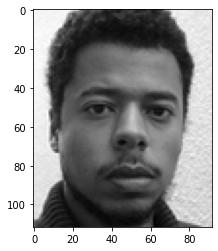

In [62]:
plt.imshow(faces["s41/2.pgm"], cmap="gray")
plt.show()

In [63]:
# vectorize the image and subtract the mean
query = faces["s41/2.pgm"].reshape(1,-1)
vector = query - pca.mean_

(1, 10304)


In [64]:
# define the function reconstruct that takes as argument
# the number of eigenfaces to use in reconstruction.
# and calculate the output image

def reconstruct(num):
  output = pca.mean_.reshape(faceshape)
  eigenfaces = pca.components_
  for i in range(num):
    weight = np.dot(vector, eigenfaces[i])
    output = output + eigenfaces[i].reshape(faceshape) * weight
  
  return output

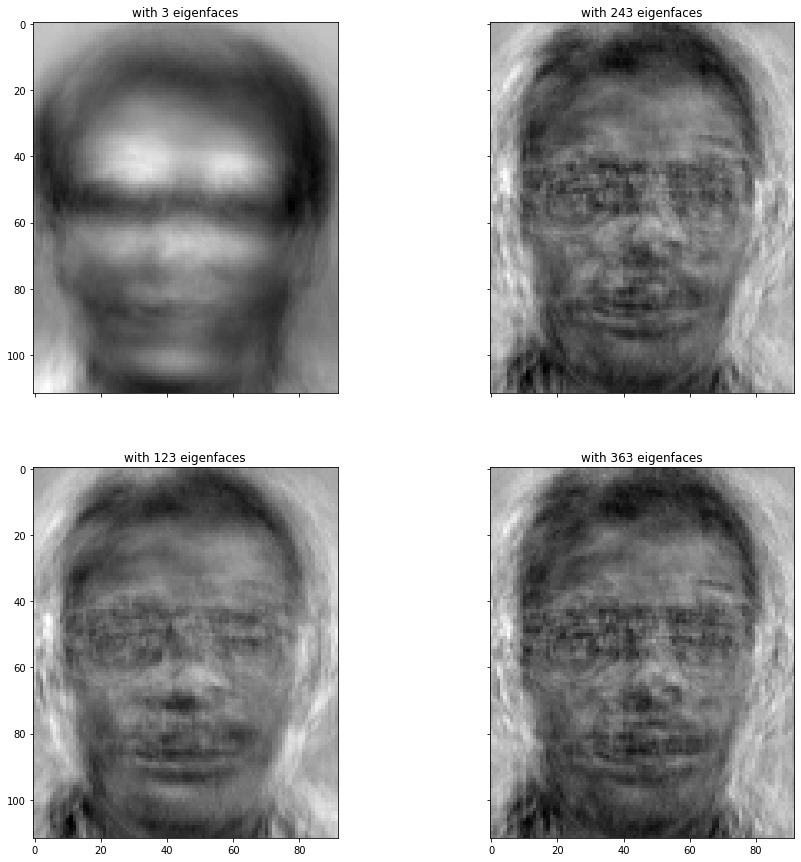

In [69]:
# display reconstruction results with different numbers of eigenfaces
fig, axes = plt.subplots(2,2,sharex=True,sharey=True,figsize=(15,15))
for i in range(4):
    axes[i%2][i//2].imshow(reconstruct(i*80+3), cmap="gray")
    axes[i%2][i//2].set_title("with {} eigenfaces".format(i*120+3))
plt.show()